# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [ ]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
319 µs ± 81.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 99.48 MiB, increment: 0.88 MiB


SIZE:  1000
Timing: 
38.8 ms ± 5.12 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 113.75 MiB, increment: 14.25 MiB


SIZE:  10000
Timing: 
3.6 s ± 36.6 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2307.80 MiB, increment: 2208.57 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


In [ ]:
c=[0.1, 0.125, 0.25, 0.33, 0.5, 0.6]

for n in range(6):
    print(f"gdy n = {n} a c = {c[n]} wtedy wynik =  {main.p_diff(n, c[n])}")

gdy n = 0 a c = 0.1 wtedy wynik =  nan
gdy n = 1 a c = 0.125 wtedy wynik =  nan
gdy n = 2 a c = 0.25 wtedy wynik =  nan
gdy n = 3 a c = 0.33 wtedy wynik =  nan
gdy n = 4 a c = 0.5 wtedy wynik =  nan
gdy n = 5 a c = 0.6 wtedy wynik =  nan


***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

kiedy wartość n = 1 a wartość e = 1.0 wtedy błąd bezwzględny jest równy = nan a błąd względny: 0.6321205588

kiedy wartość n = 2 a wartość e = 2.0 wtedy błąd bezwzględny jest równy = nan a błąd względny: 0.2642411177

kiedy wartość n = 3 a wartość e = 2.5 wtedy błąd bezwzględny jest równy = nan a błąd względny: 0.0803013971

kiedy wartość n = 4 a wartość e = 2.6666666666666665 wtedy błąd bezwzględny jest równy = nan a błąd względny: 0.0189881569

kiedy wartość n = 5 a wartość e = 2.708333333333333 wtedy błąd bezwzględny jest równy = nan a błąd względny: 0.0036598468

kiedy wartość n = 6 a wartość e = 2.7166666666666663 wtedy błąd bezwzględny jest równy = nan a błąd względny: 0.0005941848

kiedy wartość n = 7 a wartość e = 2.7180555555555554 wtedy błąd bezwzględny jest równy = nan a błąd względny: 0.0000832411

kiedy wartość n = 8 a wartość e = 2.7182539682539684 wtedy błąd bezwzględny jest równy = nan a błąd względny: 0.0000102492

kiedy wartość n = 9 a wartość e = 2.71827876984127 wte

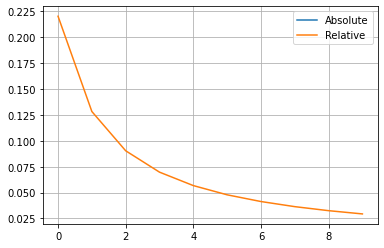

Nie wiem dlaczego nie działa błąd bezwzględny :(


In [ ]:
x = np.arange(0,10)
error_1 = np.zeros(len(x))
error_2 = np.zeros(len(x))


for n in range(10):
    error_1[n] = main.absolut_error(np.pi, main.pi(n+1))
    error_2[n] = main.relative_error(np.pi, main.pi(n+1))
    print(f"kiedy wartość n = {n + 1} a wartość e = {main.exponential(1, n + 1) } wtedy błąd bezwzględny jest równy = {main.absolut_error(np.exp(1), main.exponential(1, n + 1)) :.10f} a błąd względny: {main.relative_error(np.exp(1), main.exponential(1, n + 1)) :.10f}\n")

plt.plot(error_1,  label="Error 1 - absolut")
plt.plot(error_2, label="Error 2 - realtive")
plt.legend(["Absolute", "Relative"])
plt.grid()
plt.show()
print('Nie wiem dlaczego nie działa błąd bezwzględny :(')

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [ ]:
print("metoda 1:")

print("metoda 2:")


Error: Session cannot generate requests

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.